## Fake News Detection

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from wordcloud import WordCloud,STOPWORDS

**Importing Datasets**

**Performing Data Preprocessing**

In [2]:
df=pd.read_csv('newsdata.csv')
df1=pd.read_csv('news_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,3509,Time Magazine Makes Trump Their ‘Person Of Th...,"If you haven t heard, Donald Trump has joined ...",News,"December 8, 2016",Fake
1,19142,ADELE BREAKS “Best Album” Grammy Award In Half...,"I can t possibly accept this award, she said...",left-news,"Feb 13, 2017",Fake
2,6393,"Trump says pharma 'getting away with murder,' ...",NEW YORK (Reuters) - U.S. President-elect Dona...,politicsNews,"January 11, 2017",Real
3,15335,[VIDEO] WHY THE RACE WAR IS NOT REALLY ABOUT R...,The left believes they are winning this war. ...,politics,"Aug 12, 2015",Fake
4,9141,Orlando killer expressed support for multiple ...,"ORLANDO, Fla. (Reuters) - Orlando nightclub ki...",politicsNews,"June 12, 2016",Real


In [4]:
df.tail()

,Unnamed: 0,title,text,subject,date,label
44893,4982,Louisiana Governor Blasts Trump Over His Phot...,While Republicans try to make Louisiana s dead...,News,"August 19, 2016",Fake
44894,9263,Clinton clinches Democratic nomination: AP del...,WASHINGTON (Reuters) - Hillary Clinton has rea...,politicsNews,"June 7, 2016",Real
44895,19784,YOU’RE FIRED! MITT ROMNEY’S NIECE Tells MI GOP...,"Some of the most divisive, partisan politics c...",left-news,"Oct 18, 2016",Fake
44896,11361,TRUMP SUPPORTER FIGHTS BACK: Man Wearing “Make...,Enough is enough. Americans need to start maki...,politics,"Mar 19, 2017",Fake
44897,14493,THE BEST ANTI-HILLARY AD EVER MADE…You’ll Want...,The Ted Cruz campaign has identified the enemy...,politics,"Feb 12, 2016",Fake


In [5]:
df1.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [6]:
df1['label'] = df1['label'].replace('REAL', 'Real')
df1['label'] = df1['label'].replace('FAKE', 'Fake')

In [7]:
df1.shape

(3729, 2)

In [8]:
df.shape

(44898, 6)

In [9]:
train1=df[['text','label']]

In [10]:
train1.head()

,text,label
0,"If you haven t heard, Donald Trump has joined ...",Fake
1,"I can t possibly accept this award, she said...",Fake
2,NEW YORK (Reuters) - U.S. President-elect Dona...,Real
3,The left believes they are winning this war. ...,Fake
4,"ORLANDO, Fla. (Reuters) - Orlando nightclub ki...",Real


In [11]:
frames=[train1,df1]
train_dataset=pd.concat(frames,ignore_index=True)

In [12]:
train_dataset.shape

(48627, 2)

In [13]:
train_dataset.head()

,text,label
0,"If you haven t heard, Donald Trump has joined ...",Fake
1,"I can t possibly accept this award, she said...",Fake
2,NEW YORK (Reuters) - U.S. President-elect Dona...,Real
3,The left believes they are winning this war. ...,Fake
4,"ORLANDO, Fla. (Reuters) - Orlando nightclub ki...",Real


In [14]:
train_dataset.dropna(inplace=True)

In [15]:
train_dataset.isna().sum()

text     0
label    0
dtype: int64

**Generating WordCloud for visualization**

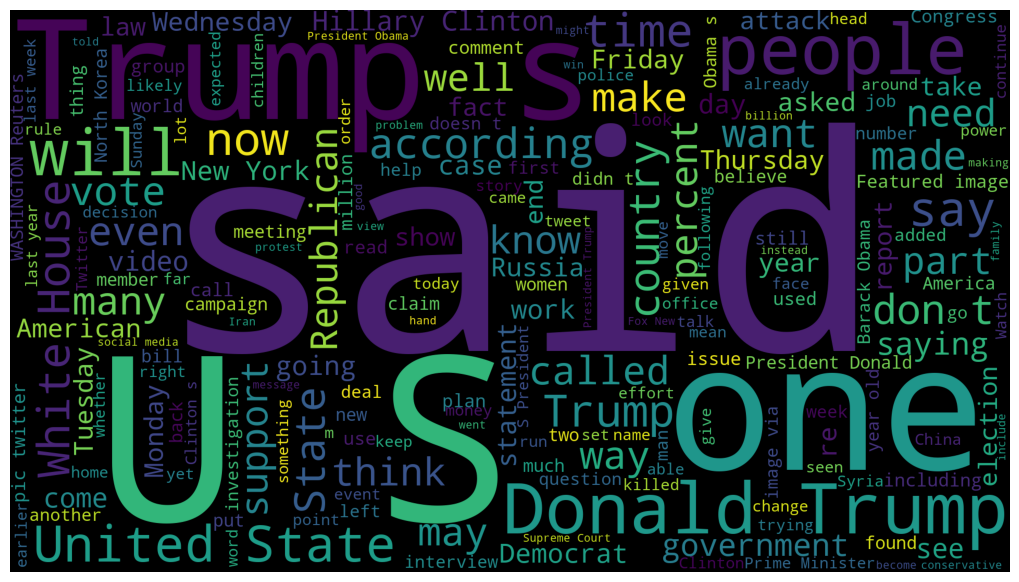

In [16]:
text = " ".join(i for i in train_dataset.text)
stopwords = set(STOPWORDS)
wordcloud=WordCloud(width=1920,height=1080,stopwords=stopwords).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
for i in train_dataset.index:
    train_dataset['text'][i]=train_dataset['text'][i].replace('\n'," ")

In [18]:
for i in train_dataset.index:
    train_dataset['text'][i]=train_dataset['text'][i].replace('\t'," ")

In [19]:
for i in train_dataset.index:
    train_dataset['text'][i]=train_dataset['text'][i].replace('\\'," ")

In [20]:
labels=train_dataset.label

In [21]:
labels.head()

0    Fake
1    Fake
2    Real
3    Fake
4    Real
Name: label, dtype: object

In [22]:
x_train,x_test,y_train,y_test=train_test_split(train_dataset['text'],labels,test_size=0.2,random_state=20) #random state is just like seed

In [23]:
# TFIDF Initialization
vector = TfidfVectorizer(stop_words='english',max_df=0.7) #max_df is max document freq 

In [24]:
# fit and transform
tf_train=vector.fit_transform(x_train)
tf_test=vector.transform(x_test)

In [25]:
# initialize passive aggressive classifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [26]:
# predicting on test data sets
y_pred=pac.predict(tf_test)

In [27]:
score = accuracy_score(y_test,y_pred)

In [28]:
print(f"Accuracy is : {round(score*100,2)}%")

Accuracy is : 99.36%


In [29]:
# Confusion Matrix
confusion_matrix(y_test,y_pred,labels=['Fake','Real'])

array([[5030,   33],
       [  29, 4632]], dtype=int64)

**Classification Report**

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5063
        Real       0.99      0.99      0.99      4661

    accuracy                           0.99      9724
   macro avg       0.99      0.99      0.99      9724
weighted avg       0.99      0.99      0.99      9724



In [31]:
# saving model
file_name='model.sav'
joblib.dump(pac,file_name)

['model.sav']

In [32]:
#saving vectorizer model
file_name_1='vector.sav'
joblib.dump(vector,file_name_1)

['vector.sav']

In [33]:
#saving test data
# frames=[x_test,y_test]
# test=pd.concat(frames,axis=1)
# test.to_csv('testdata.csv')